# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [6]:
# Libraries
import pandas as pd
import sqlalchemy
import numpy as np
import matplotlib.pyplot as plt


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [28]:
pwd

'/Users/anna/Desktop/Ironhack/Week_4/lab-linear-regression-correlation/your-code'

In [29]:
/Users/anna/Desktop/Ironhack/Week_4/lab-linear-regression-correlation/data

NameError: name 'Users' is not defined

In [31]:
absences = pd.read_csv('/Users/anna/Desktop/Ironhack/Week_4/lab-linear-regression-correlation/data/absences.csv')

In [32]:
absences.head(5)

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


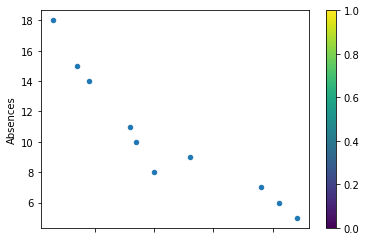

In [45]:
# Showcase a Scatterplot. Put the dots in Dark Blue

absences_scplt = absences.plot.scatter(x = 'Age',
                           y = 'Absences',
                           colormap= 'viridis')

#### What we can see in the graph above

What we can clearly see is that the suspicion is right.
The correlation between age and number of absences, is strongly negatively related.
The younger the employee, the higher the number of absences. As the employee gets older, the number of absences reduces.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [29]:
#Import the library for Linear regression
from scipy import stats

from sklearn.linear_model import LinearRegression

In [63]:
# An overview of the "quick way"

In [64]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [65]:
slope

-0.2681088337033403

In [66]:
intercept

21.58738189891063

In [67]:
# Create lists from element of columns
x = absences.Age.tolist()
y = absences.Absences.tolist()

In [61]:
#The list of Ages
x

[27, 61, 37, 23, 46, 58, 29, 36, 64, 40]

In [62]:
# The list of Absences
y

[15, 6, 10, 18, 9, 7, 14, 11, 5, 8]

In [47]:
def substract_mean (X):
    x_mean = np.mean(X)
    print(x_mean)
    return [elem - x_mean for elem in X]

In [59]:
# Test function

substract_mean(x)

42.1


[-15.100000000000001,
 18.9,
 -5.100000000000001,
 -19.1,
 3.8999999999999986,
 15.899999999999999,
 -13.100000000000001,
 -6.100000000000001,
 21.9,
 -2.1000000000000014]

In [69]:
substract_mean(y)

10.3


[4.699999999999999,
 -4.300000000000001,
 -0.3000000000000007,
 7.699999999999999,
 -1.3000000000000007,
 -3.3000000000000007,
 3.6999999999999993,
 0.6999999999999993,
 -5.300000000000001,
 -2.3000000000000007]

In [82]:
def slope_nominator(X,Y):
   
    X = substract_mean(X)
    Y = substract_mean(Y)
    sumxy = 0
    for x,y in zip (X,Y):
        return sumxy == sumxy + (X*Y)

slope_nominator(x,y)

42.1
10.3


TypeError: can't multiply sequence by non-int of type 'list'

In [89]:
def slope_nominator(X, Y):
   
    X = substract_mean(X)
    Y = substract_mean(Y)
    print(X)
    print(Y)
    sum1 = 0
    for x,y in zip(X,Y):
        #print('x = ', x,' y = ', y)
        sum1=sum1 +  x*y
        return sum1
    # for sample population: 
    # return sum1 / (n-1)
    

slope_nominator(x,y)

42.1
10.3
[-15.100000000000001, 18.9, -5.100000000000001, -19.1, 3.8999999999999986, 15.899999999999999, -13.100000000000001, -6.100000000000001, 21.9, -2.1000000000000014]
[4.699999999999999, -4.300000000000001, -0.3000000000000007, 7.699999999999999, -1.3000000000000007, -3.3000000000000007, 3.6999999999999993, 0.6999999999999993, -5.300000000000001, -2.3000000000000007]


-70.97

In [90]:
def slope_denominator(X,Y):
    X = substract_mean(X)
    sum2 = sum2 + X
    return sum2

In [92]:
def slope (X,Y):
    slope = slope_nominator(X,Y)/slope_denominator(X,Y)
    return slope

slope(x,y)

42.1
10.3
[-15.100000000000001, 18.9, -5.100000000000001, -19.1, 3.8999999999999986, 15.899999999999999, -13.100000000000001, -6.100000000000001, 21.9, -2.1000000000000014]
[4.699999999999999, -4.300000000000001, -0.3000000000000007, 7.699999999999999, -1.3000000000000007, -3.3000000000000007, 3.6999999999999993, 0.6999999999999993, -5.300000000000001, -2.3000000000000007]
42.1


UnboundLocalError: local variable 'sum2' referenced before assignment

In [94]:
# CORRELATION. Step1


# Create lists from element of columns
x = absences.Age.tolist()
y = absences.Absences.tolist()

In [108]:
# CORRELATION. Step2

def substract_mean (X):
    x_mean = np.mean(X)
    #print(x_mean)
    return [elem - x_mean for elem in X]

In [109]:
# CORRELATION. Step3

def get_covar1(X, Y):
    n = len(X)
    X = substract_mean(X)
    Y = substract_mean(Y)
    #print(X)
    #print(Y)
    sum1 = 0
    for x,y in zip(X,Y):
        #print('x = ', x,' y = ', y)
        sum1 += x*y
    # for sample population: 
    # return sum1 / (n-1)
    return sum1 / n

In [110]:
# CORRELATION. Step4
def correlation(X, Y):
    s_x = np.std(X) # ddof=0, for sample
    s_y = np.std(Y)
    return get_covar1(X,Y) / (s_x * s_y)

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [111]:
# your code here
correlation(x,y)

-0.9325434092481012

In [112]:
# your comments here

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [113]:
# your code here

def cov_corr (X,Y):
    covar = get_covar1(X, Y)
    print("The covariance between both variables is: ", covar)
    corr = correlation(X, Y)
    print("The correlation between both variables is: ", corr)
    


The covariance between both variables is:  -51.92999999999999
The correlation between both variables is:  -0.9325434092481012


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [114]:
# your code here
cov_corr(x,y)    

The covariance between both variables is:  -51.92999999999999
The correlation between both variables is:  -0.9325434092481012


#### your comments here

As expected the correlation amongst both variables is negative. The older the employer is, the lowe the number of
absences. The correlation is close to -1, therefore this are 2 strongly correlated variables.

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

# your comments here
From a visual perspective when plotting the data , as well as from a statistical perspective we can strongly
determine that the the younger the employee is, the higher the chance he/she will have more absennces.
The older the employee gets, the lower the number of absences.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [7]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})


In [8]:
x = ironbeers_df.X.tolist()
y = ironbeers_df.Y.tolist()
x

[1, 3, 4, 6, 8, 9, 11, 14]

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [119]:
# your code here
cov_corr(x,y) 

The covariance between both variables is:  10.5
The correlation between both variables is:  0.9770084209183942


#### your comments here

Both variables are highly correlated, with a correlation of almost 1.
This indicates that the more people you invite to Ironbeers, the more that will actually attend.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

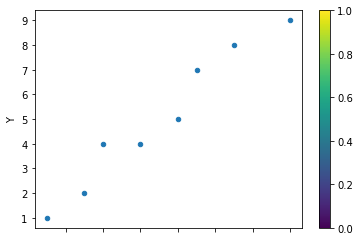

In [120]:
# your code here

ironbeers_scplt = ironbeers_df.plot.scatter(x = 'X',
                           y = 'Y',
                           colormap= 'viridis')

#### your comments here

The scatterplot is an affirmation of our prior theory.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

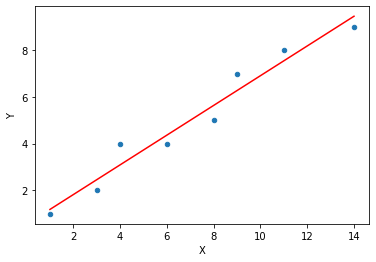

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ironbeers_df
X = ironbeers_df[['X']]
Y = ironbeers_df[['Y']]

clf = LinearRegression()
clf.fit(X,Y)

ironbeers_df.plot(x ='X', y = 'Y', kind = 'scatter')
plt.plot(ironbeers_df['X'], clf.predict(X), color = 'red')

In [35]:
# your comments here


slope, intercept, r_value, p_value, std_err = stats.linregress('X','Y')



TypeError: len() of unsized object

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

### your comments here
The conclusion is that myself and others should promote Ironbeers so that more people stay and it´s more fun!

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here